In [1]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.3.2

Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Successfully uninstalled scikit-learn-1.3.2
  Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)


Library Setup

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("loan.csv")
dic = pd.read_excel("LCDataDictionary.xlsx")

Analysing Dataset - Showing the Distribution of Features

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(887379, 74)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [7]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


In [8]:
columns = df.columns.to_list()
print("Features in given dataset are :",columns)

Features in given dataset are : ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open

Columns having Missing Values

In [9]:
for i in df.columns:
  print(i,":",round(df[i].isnull().sum()/df.shape[0]*100,5),", data_type:", df[i].dtype)

id : 0.0 , data_type: int64
member_id : 0.0 , data_type: int64
loan_amnt : 0.0 , data_type: float64
funded_amnt : 0.0 , data_type: float64
funded_amnt_inv : 0.0 , data_type: float64
term : 0.0 , data_type: object
int_rate : 0.0 , data_type: float64
installment : 0.0 , data_type: float64
grade : 0.0 , data_type: object
sub_grade : 0.0 , data_type: object
emp_title : 5.79933 , data_type: object
emp_length : 5.05139 , data_type: object
home_ownership : 0.0 , data_type: object
annual_inc : 0.00045 , data_type: float64
verification_status : 0.0 , data_type: object
issue_d : 0.0 , data_type: object
loan_status : 0.0 , data_type: object
pymnt_plan : 0.0 , data_type: object
url : 0.0 , data_type: object
desc : 85.79795 , data_type: object
purpose : 0.0 , data_type: object
title : 0.01724 , data_type: object
zip_code : 0.0 , data_type: object
addr_state : 0.0 , data_type: object
dti : 0.0 , data_type: float64
delinq_2yrs : 0.00327 , data_type: float64
earliest_cr_line : 0.00327 , data_type: obj

Complete data of One row

In [10]:
df.iloc[0]

,0
id,1077501
member_id,1296599
loan_amnt,5000.0
funded_amnt,5000.0
funded_amnt_inv,4975.0
...,...
all_util,NaN
total_rev_hi_lim,NaN
inq_fi,NaN
total_cu_tl,NaN


Unique rows in each columns

In [11]:
for i in df.columns:
  print("Number of unique values in",i,":",df[i].nunique())

Number of unique values in id : 887379
Number of unique values in member_id : 887379
Number of unique values in loan_amnt : 1372
Number of unique values in funded_amnt : 1372
Number of unique values in funded_amnt_inv : 9856
Number of unique values in term : 2
Number of unique values in int_rate : 542
Number of unique values in installment : 68711
Number of unique values in grade : 7
Number of unique values in sub_grade : 35
Number of unique values in emp_title : 299271
Number of unique values in emp_length : 11
Number of unique values in home_ownership : 6
Number of unique values in annual_inc : 49384
Number of unique values in verification_status : 3
Number of unique values in issue_d : 103
Number of unique values in loan_status : 10
Number of unique values in pymnt_plan : 2
Number of unique values in url : 887379
Number of unique values in desc : 124468
Number of unique values in purpose : 14
Number of unique values in title : 63143
Number of unique values in zip_code : 935
Number o

Analysing target variable : loan_status

In [12]:
df["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [13]:
df["loan_status"].value_counts()

,count
loan_status,
Current,601779
Fully Paid,207723
Charged Off,45248
Late (31-120 days),11591
Issued,8460
In Grace Period,6253
Late (16-30 days),2357
Does not meet the credit policy. Status:Fully Paid,1988
Default,1219


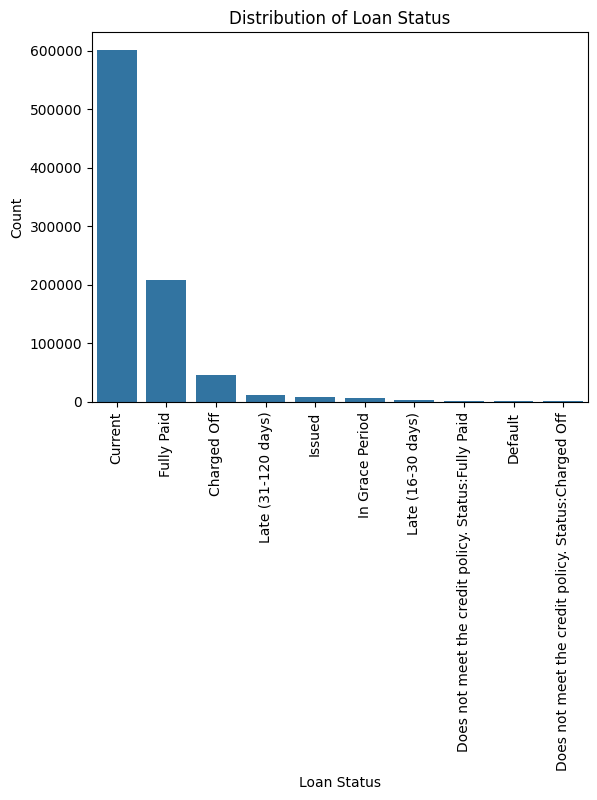

In [14]:
plt.plot(figsize=(12,6))
sns.barplot(x=df["loan_status"].value_counts().index, y=df["loan_status"].value_counts())
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.title("Distribution of Loan Status")
plt.xticks(rotation=90)
plt.show()

#Data Preprocessing


In [15]:

print(df.columns.tolist())

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il

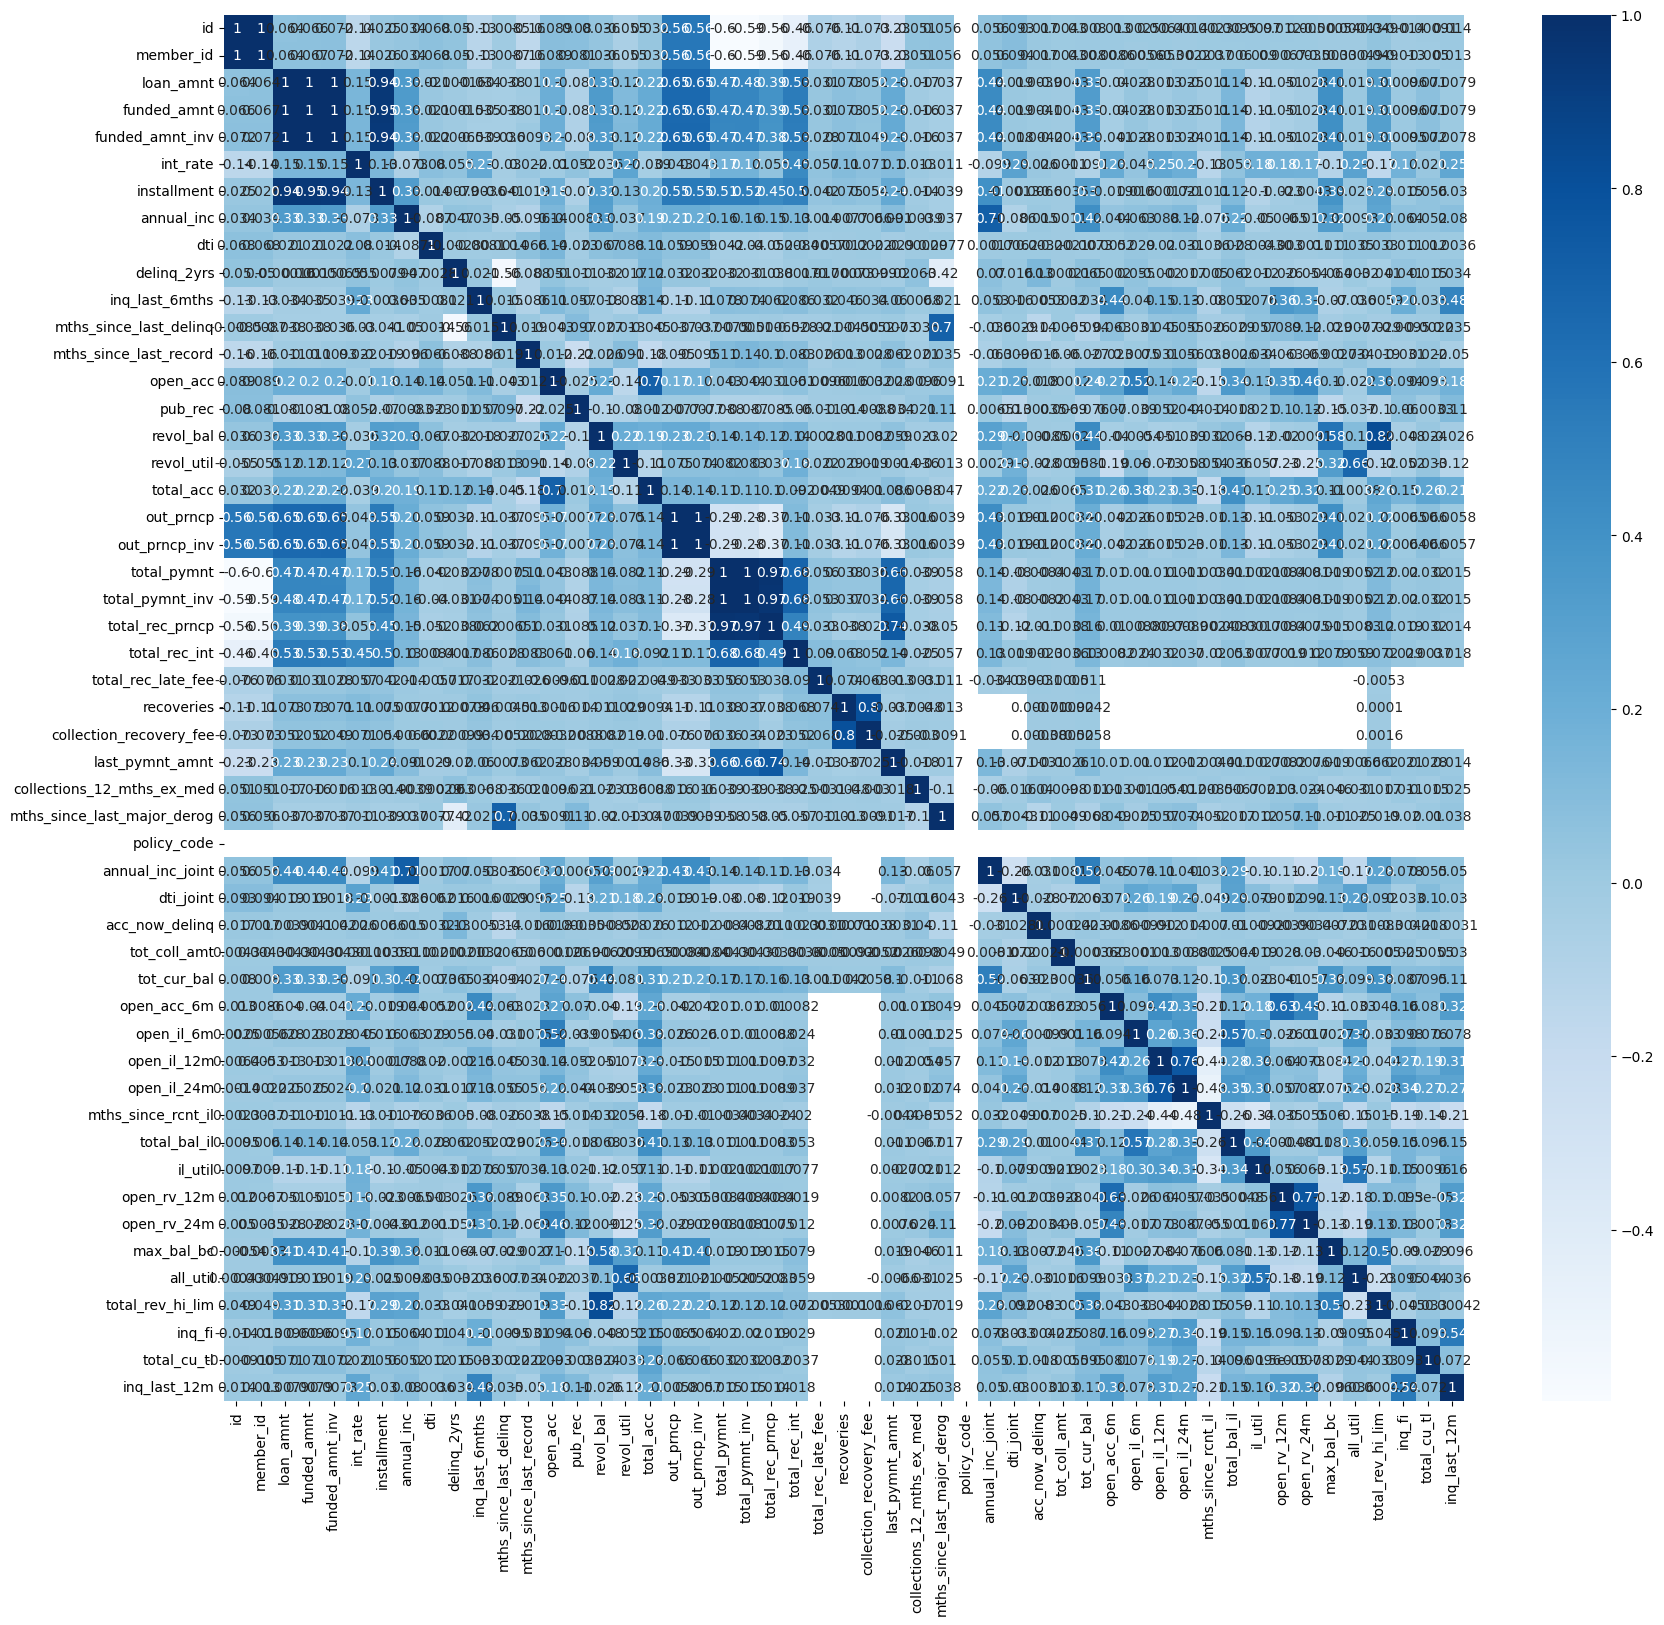

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
df_num = df.select_dtypes(exclude=['object'])
plt.figure(figsize=(20, 18))
sns.heatmap(df_num.corr(), annot=True, cmap='Blues')
plt.show()

Select columns that related to credit risk from domain knowledge

x-variables

* loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
* term: The number of payments on the loan. Values are in months and can be either 36 or 60.
* dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
* annual_inc: The self-reported annual income provided by the borrower during registration.
* delinq_2yrs: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.
* open_acc: The number of open credit lines in the borrower's credit file.
* grade: LC assigned loan grade.
* home_ownership: The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
* collections_12_mths_ex_med: Number of collections in 12 months excluding medical collections.
* revol_bal: Total credit revolving balance.
* total_acc: The total number of credit lines currently in the borrower's credit file.

y-variable

* loan_status: Current status of the loan

In [17]:
df_sel = df[['loan_amnt', 'int_rate', 'term', 'dti', 'annual_inc', 'delinq_2yrs','open_acc', 'grade',
'home_ownership','collections_12_mths_ex_med','revol_bal', 'total_acc','last_pymnt_amnt','loan_status']]

In [18]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   887379 non-null  float64
 1   int_rate                    887379 non-null  float64
 2   term                        887379 non-null  object 
 3   dti                         887379 non-null  float64
 4   annual_inc                  887375 non-null  float64
 5   delinq_2yrs                 887350 non-null  float64
 6   open_acc                    887350 non-null  float64
 7   grade                       887379 non-null  object 
 8   home_ownership              887379 non-null  object 
 9   collections_12_mths_ex_med  887234 non-null  float64
 10  revol_bal                   887379 non-null  float64
 11  total_acc                   887350 non-null  float64
 12  last_pymnt_amnt             887379 non-null  float64
 13  loan_status   

Checking for the null values in the selected features -

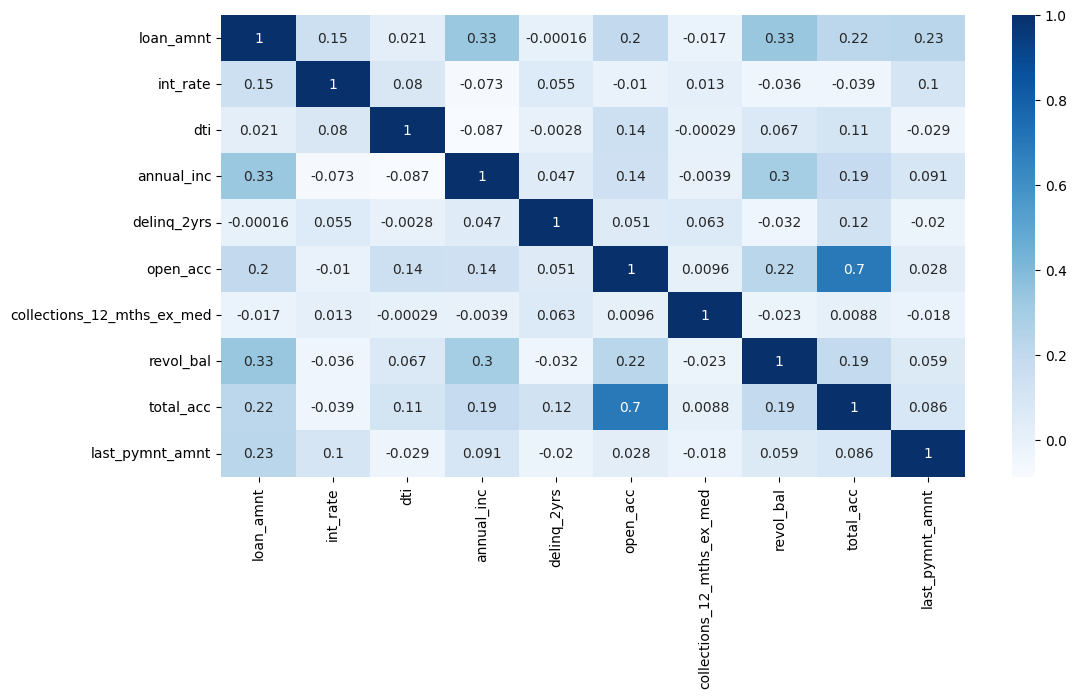

In [19]:
df_num1 = df_sel.select_dtypes(exclude=['object'])
plt.figure(figsize=(12,6))
sns.heatmap(df_num1.corr(), annot=True, cmap='Blues')
plt.show()

In [20]:
df_sel.isnull().sum()

,0
loan_amnt,0
int_rate,0
term,0
dti,0
annual_inc,4
delinq_2yrs,29
open_acc,29
grade,0
home_ownership,0
collections_12_mths_ex_med,145


Features annual_inc, delinq_2yrs, open_acc, collections_12_mths_ex_med and total_acc have null values.

Removing null values

In [21]:
df_sel = df_sel.dropna()

In [22]:
df_sel.isnull().sum()

,0
loan_amnt,0
int_rate,0
term,0
dti,0
annual_inc,0
delinq_2yrs,0
open_acc,0
grade,0
home_ownership,0
collections_12_mths_ex_med,0


Null values have been removed

In [23]:
df_sel.shape

(887234, 14)

In [24]:
df_sel.head(15)

,loan_amnt,int_rate,term,dti,annual_inc,delinq_2yrs,open_acc,grade,home_ownership,collections_12_mths_ex_med,revol_bal,total_acc,last_pymnt_amnt,loan_status
0,5000.0,10.65,36 months,27.65,24000.0,0.0,3.0,B,RENT,0.0,13648.0,9.0,171.62,Fully Paid
1,2500.0,15.27,60 months,1.00,30000.0,0.0,3.0,C,RENT,0.0,1687.0,4.0,119.66,Charged Off
2,2400.0,15.96,36 months,8.72,12252.0,0.0,2.0,C,RENT,0.0,2956.0,10.0,649.91,Fully Paid
3,10000.0,13.49,36 months,20.00,49200.0,0.0,10.0,C,RENT,0.0,5598.0,37.0,357.48,Fully Paid
4,3000.0,12.69,60 months,17.94,80000.0,0.0,15.0,B,RENT,0.0,27783.0,38.0,67.79,Current
5,5000.0,7.90,36 months,11.20,36000.0,0.0,9.0,A,RENT,0.0,7963.0,12.0,161.03,Fully Paid
6,7000.0,15.96,60 months,23.51,47004.0,0.0,7.0,C,RENT,0.0,17726.0,11.0,170.08,Current
7,3000.0,18.64,36 months,5.35,48000.0,0.0,4.0,E,RENT,0.0,8221.0,4.0,111.34,Fully Paid
8,5600.0,21.28,60 months,5.55,40000.0,0.0,11.0,F,OWN,0.0,5210.0,13.0,152.39,Charged Off
9,5375.0,12.69,60 months,18.08,15000.0,0.0,2.0,B,RENT,0.0,9279.0,3.0,121.45,Charged Off


In [25]:
df_sel['delinq_2yrs'].value_counts()

,count
delinq_2yrs,
0.0,716866
1.0,113210
2.0,33547
3.0,11977
4.0,5325
5.0,2711
6.0,1471
7.0,784
8.0,461


In [26]:
df_sel["collections_12_mths_ex_med"].value_counts()

,count
collections_12_mths_ex_med,
0.0,875553
1.0,10824
2.0,732
3.0,88
4.0,23
5.0,7
6.0,2
16.0,1
20.0,1


Classify loan_status to 5 categories:
1. Current: Current
2. Normal: Fully Paid, In Grace Period, Issued
3. Delinquent: Late (16-30 days), Late (31-120 days),
4. Default: Charged Off, Default
5. Not Compliant: Does not meet the credit policy. Status: Fully Paid, Does not meet the credit policy. Status: Charged Off

In [27]:
def categorize_loan_status(status):
    if status in ['Fully Paid', 'In Grace Period', 'Issued']:
        return 'Normal'
    elif status in ['Late (16-30 days)', 'Late (31-120 days)']:
        return 'Delinquent'
    elif status in ['Charged Off', 'Default']:
        return 'Default'
    elif 'Does not meet the credit policy' in status:
        return 'Not Compliant'
    elif 'Current' in status:
        return 'Current'
    else:
        return 'Unknown'

df_sel['loan_status'] = df_sel['loan_status'].apply(categorize_loan_status)

In [28]:
df_sel['loan_status'].value_counts()

,count
loan_status,
Current,601779
Normal,222386
Default,46461
Delinquent,13948
Not Compliant,2660


#Data Visualization

Loan status versus count

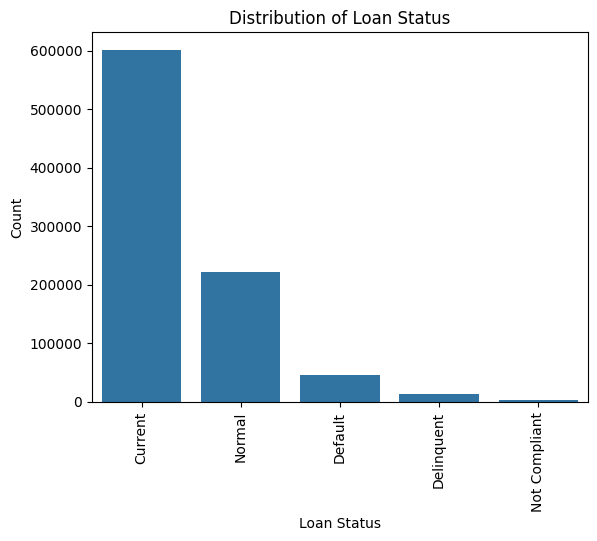

In [29]:
plt.plot(figsize=(12,6))
sns.barplot(x=df_sel["loan_status"].value_counts().index, y=df_sel["loan_status"].value_counts())
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.title("Distribution of Loan Status")
plt.xticks(rotation=90)
plt.show()

Loan status versus loan amount

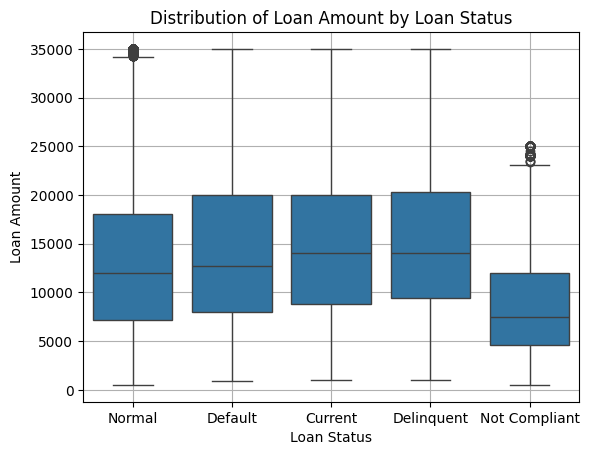

In [30]:
plt.plot(figsize=(12,6))
sns.boxplot(x="loan_status", y="loan_amnt", data = df_sel)
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.title("Distribution of Loan Amount by Loan Status")
plt.grid()
plt.show()

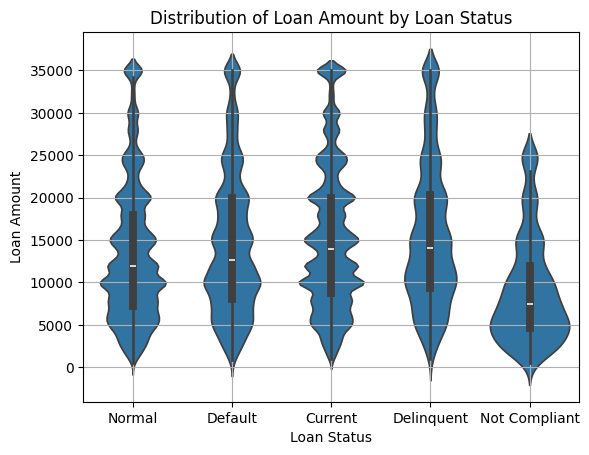

In [31]:
plt.plot(figsize=(12,6))
sns.violinplot(x="loan_status", y="loan_amnt", data = df_sel)
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.title("Distribution of Loan Amount by Loan Status")
plt.grid()
plt.show()


1. Loan which as non compliant are generally loan of lower amounts.
2. Delinquent(when the borrower fails to make their scheduled payments on time) loan status are associated with higher loan amount.
3. Delinquent and default follows the same distribution pattern.





Loan amount versus grade

In [32]:
df_sel["grade"].value_counts()

,count
grade,
B,254506
C,245833
A,148167
D,139525
E,70687
F,23034
G,5482


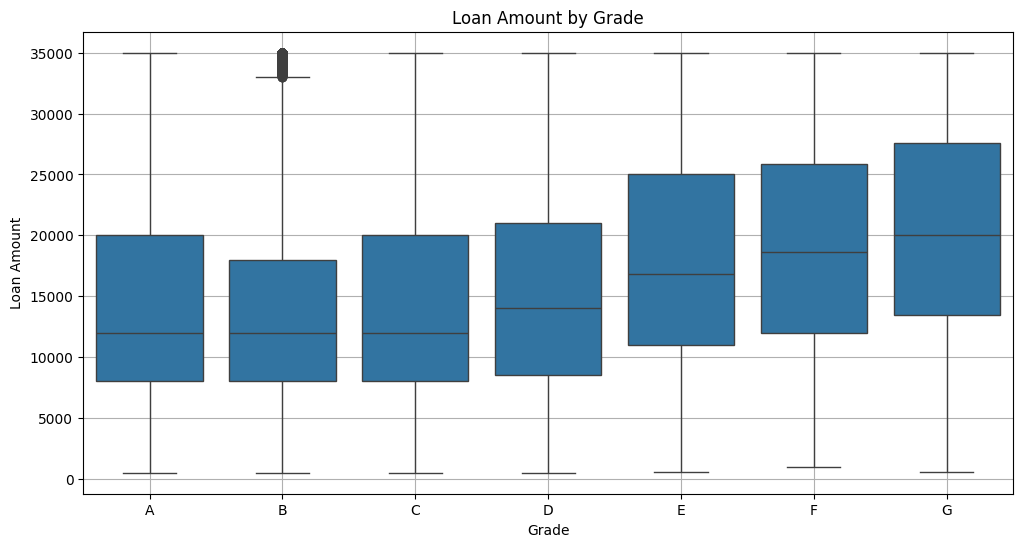

In [33]:
plt.figure(figsize=(12,6))
sns.boxplot(x="grade", y = "loan_amnt", data=df_sel, order = ['A','B','C','D','E','F','G'])
plt.title("Loan Amount by Grade")
plt.xlabel("Grade")
plt.ylabel("Loan Amount")
plt.grid()
plt.show()

We can observe that for loans under grade A, B and C have the same median loan amount, wheareas the median amount keeps on gradually increasing for loan grade E, F and G.

Loan status versus Grade

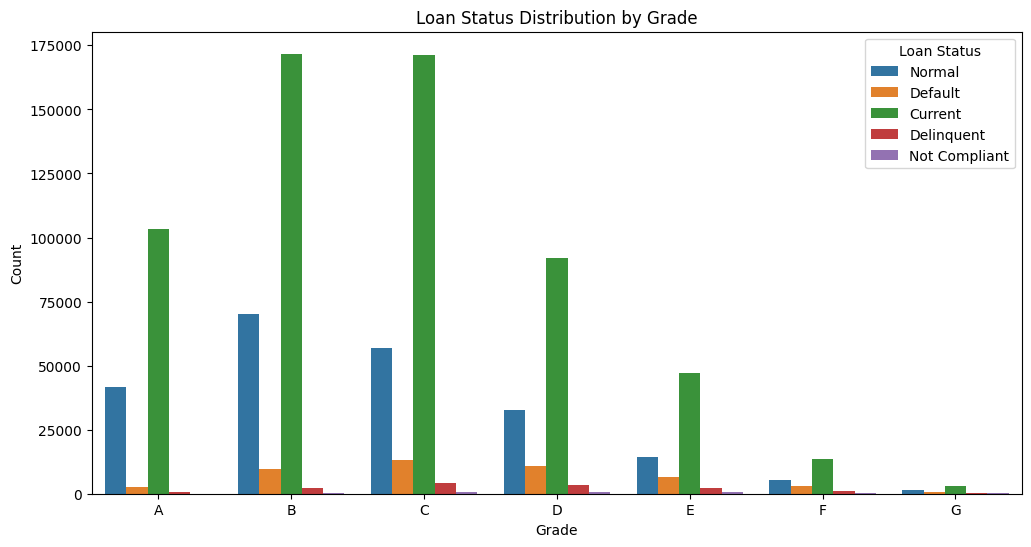

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.countplot(x='grade', hue='loan_status', data=df_sel, order = ['A','B','C','D','E','F','G'])
plt.title('Loan Status Distribution by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

As the loan grade increases, the proportion of individuals in the default and delinquent categories noticeably rises.

Loan status versus Interest Rate

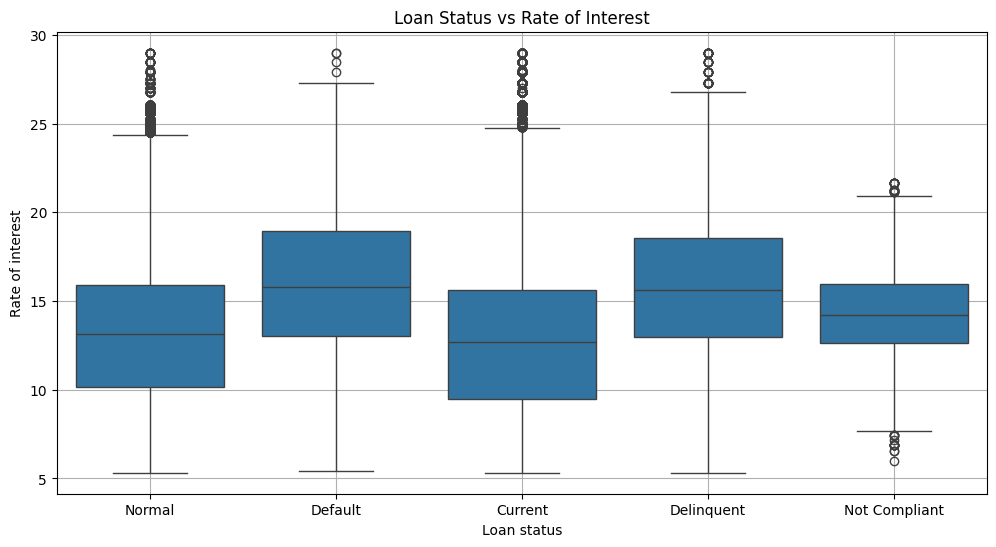

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.boxplot(x='loan_status', y='int_rate', data = df_sel)
plt.xlabel("Loan status")
plt.ylabel("Rate of interest")
plt.title("Loan Status vs Rate of Interest")
plt.grid()
plt.show()

It can be observed from the above plot that the interest rate for the Default and Delinquent categories is significantly higher than for normal loans and even the Not Compliant category shows a slightly higher interest rate than normal. So, we can conclude that this elevated interest rate might be one of the factors contributing to the increased likelihood of default or delinquency.

Loan status versus Annual Income

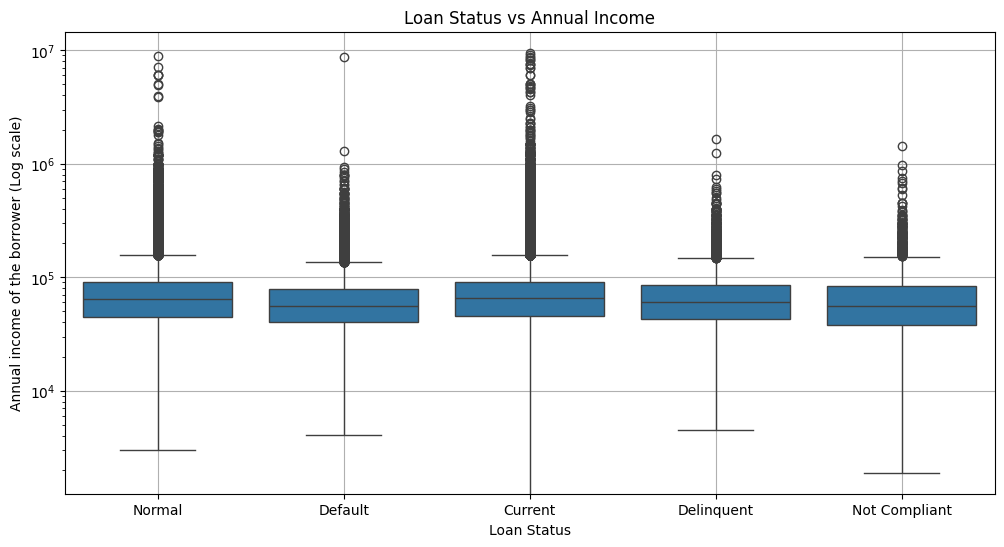

In [36]:
plt.figure(figsize=(12,6))
sns.boxplot(x="loan_status", y="annual_inc", data = df_sel)
plt.xlabel("Loan Status")
plt.yscale("log")
plt.ylabel("Annual income of the borrower (Log scale)")
plt.title("Loan Status vs Annual Income")
plt.grid()
plt.show()

It can be observed from the above plot that the annual income for the Default, Delinquent and Not Compliant categories is lower than for normal loans. SO, we can conclude that this lower income of the borrower might be one of the factors contributing to the increased likelihood of default or delinquency.

Loan status versus Home Ownership

In [37]:
df_sel['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,443500
RENT,356048
OWN,87457
OTHER,182
NONE,44
ANY,3


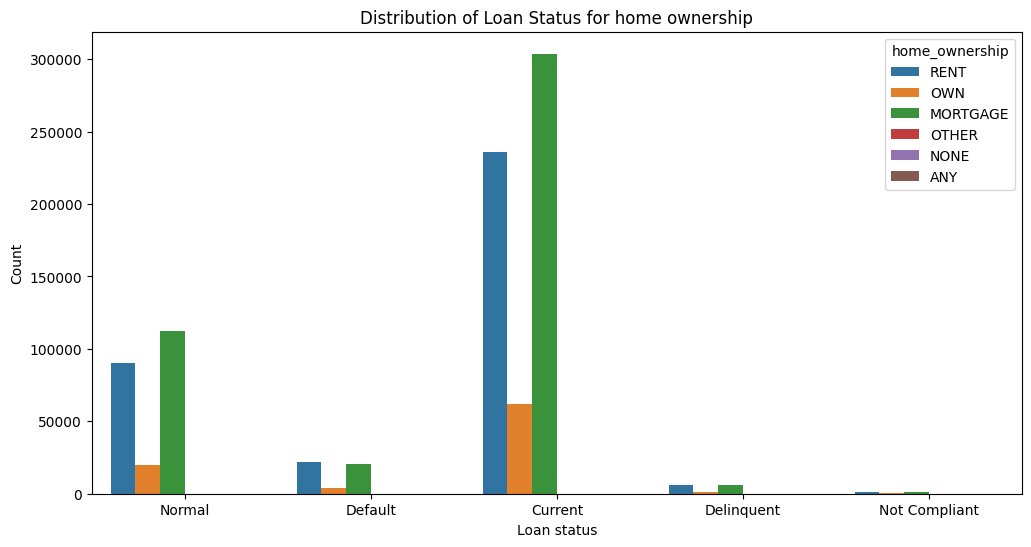

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.countplot(x='loan_status', data = df_sel, hue='home_ownership')
plt.xlabel("Loan status")
plt.ylabel("Count")
plt.title("Distribution of Loan Status for home ownership")
plt.show()

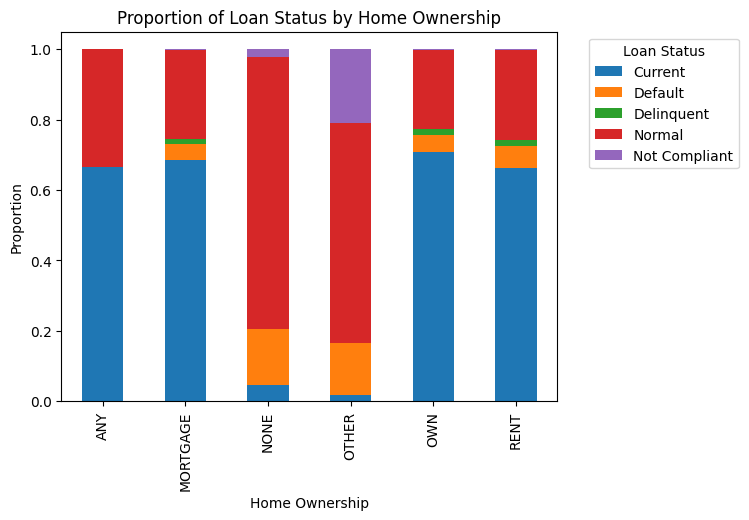

In [39]:
cross_tab = pd.crosstab(df_sel["home_ownership"], df_sel["loan_status"])
cross_tab_perc = cross_tab.div(cross_tab.sum(1), axis=0)

#colors = sns.color_palette("Greens", n_colors=cross_tab_perc.shape[1])
cross_tab_perc.plot(kind="bar", stacked=True)

plt.title('Proportion of Loan Status by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Proportion')

plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

Individuals whose home ownership fall under the "Mortgage," "Own," or "Rent" categories tend to have a lower default rate, while those in the "None" and "Other" categories show a higher rate of default.

#Convert categorical variables to one-hot encoding:
Loan tenure, grade, and home_ownership.

In [40]:
def term_encoder(value):
  if value == "36 months":
    return 1
  else:
    return 0

def garde_encoder(value):
  if value == "A":
    return 1
  elif value == "B":
    return 2
  elif value == "C":
    return 3
  elif value == "D":
    return 4
  elif value == "E":
    return 5
  elif value == "F":
    return 6
  else:
    return 7

def home_ownership_encoder(value):
  if value == "RENT":
    return 1
  elif value == "MORTGAGE":
    return 2
  elif value == "OWN":
    return 3
  else:
    return 4

In [41]:
df_sel["term"] = df_sel["term"].apply(term_encoder)
df_sel["grade"] = df_sel["grade"].apply(garde_encoder)
df_sel["home_ownership"] = df_sel["home_ownership"].apply(home_ownership_encoder)

In [42]:
df_sel.head(10)

,loan_amnt,int_rate,term,dti,annual_inc,delinq_2yrs,open_acc,grade,home_ownership,collections_12_mths_ex_med,revol_bal,total_acc,last_pymnt_amnt,loan_status
0,5000.0,10.65,0,27.65,24000.0,0.0,3.0,2,1,0.0,13648.0,9.0,171.62,Normal
1,2500.0,15.27,0,1.00,30000.0,0.0,3.0,3,1,0.0,1687.0,4.0,119.66,Default
2,2400.0,15.96,0,8.72,12252.0,0.0,2.0,3,1,0.0,2956.0,10.0,649.91,Normal
3,10000.0,13.49,0,20.00,49200.0,0.0,10.0,3,1,0.0,5598.0,37.0,357.48,Normal
4,3000.0,12.69,0,17.94,80000.0,0.0,15.0,2,1,0.0,27783.0,38.0,67.79,Current
5,5000.0,7.90,0,11.20,36000.0,0.0,9.0,1,1,0.0,7963.0,12.0,161.03,Normal
6,7000.0,15.96,0,23.51,47004.0,0.0,7.0,3,1,0.0,17726.0,11.0,170.08,Current
7,3000.0,18.64,0,5.35,48000.0,0.0,4.0,5,1,0.0,8221.0,4.0,111.34,Normal
8,5600.0,21.28,0,5.55,40000.0,0.0,11.0,6,3,0.0,5210.0,13.0,152.39,Default
9,5375.0,12.69,0,18.08,15000.0,0.0,2.0,2,1,0.0,9279.0,3.0,121.45,Default


#Modelling

In [43]:
df_sel["loan_status"].value_counts().reset_index()

,loan_status,count
0,Current,601779
1,Normal,222386
2,Default,46461
3,Delinquent,13948
4,Not Compliant,2660


From the above data we can find that the distribution of loan status is imbalanced.

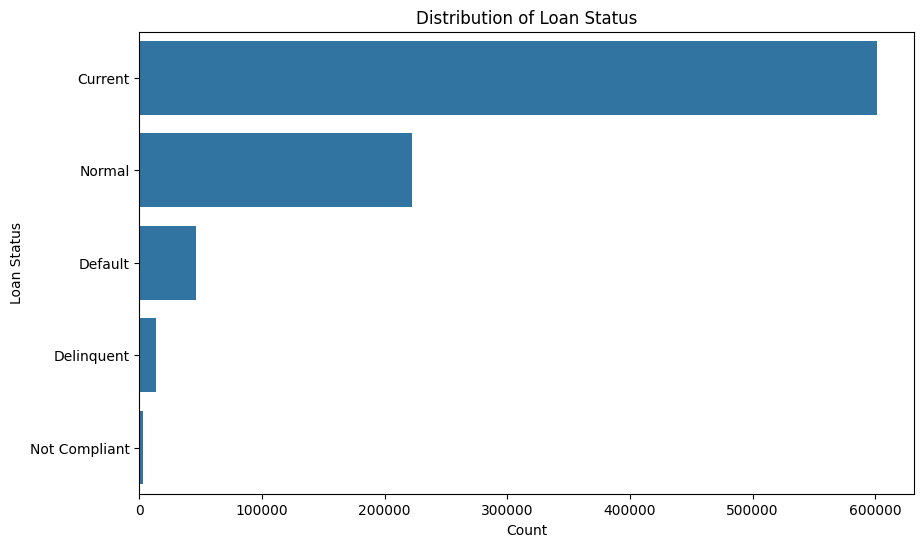

In [44]:
# Calculate the count of each category of loan status
loan_status_counts = df_sel["loan_status"].value_counts().reset_index()
loan_status_counts.columns = ["Loan Status", "Count"]

plt.figure(figsize=(10, 6))
sns.barplot(y="Loan Status", x="Count", data=loan_status_counts)

plt.title('Distribution of Loan Status')
plt.ylabel('Loan Status')
plt.xlabel('Count')

plt.show()

In [45]:
y= df_sel["loan_status"]
# encoded loan status to numbers
def loan_status_encoded(text):
    if text == "Normal":
        return 0
    elif text in ['Default','Delinquent	','Not Compliant']:
        return 1
    else:
        return 2

y_encoded= y.apply(loan_status_encoded)

In [46]:
y_encoded.value_counts()

,count
loan_status,
2,615727
0,222386
1,49121


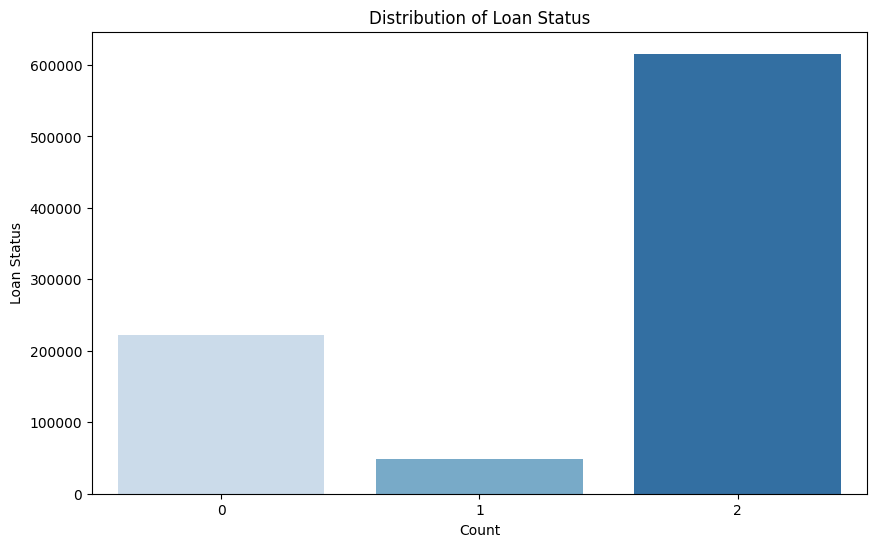

In [47]:
#  Calculate the count of each category of encoded loan status
loan_status_counts = y_encoded.value_counts().reset_index()
loan_status_counts.columns = ['Loan Status', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(y='Count', x='Loan Status', data=loan_status_counts, palette="Blues")

plt.title('Distribution of Loan Status')
plt.xlabel('Count')
plt.ylabel('Loan Status')

plt.show()

In [48]:
df_sel['loan_status'].unique()

array(['Normal', 'Default', 'Current', 'Delinquent', 'Not Compliant'],
      dtype=object)

In [49]:
df_sel.shape

(887234, 14)

In [50]:
df_sel = df_sel[df_sel['loan_status'] != 'Current']

In [51]:
df_sel['loan_status'].unique()

array(['Normal', 'Default', 'Delinquent', 'Not Compliant'], dtype=object)

In [52]:
df_sel.shape

(285455, 14)

In [53]:
df_sel.head(10)

,loan_amnt,int_rate,term,dti,annual_inc,delinq_2yrs,open_acc,grade,home_ownership,collections_12_mths_ex_med,revol_bal,total_acc,last_pymnt_amnt,loan_status
0,5000.0,10.65,0,27.65,24000.0,0.0,3.0,2,1,0.0,13648.0,9.0,171.62,Normal
1,2500.0,15.27,0,1.00,30000.0,0.0,3.0,3,1,0.0,1687.0,4.0,119.66,Default
2,2400.0,15.96,0,8.72,12252.0,0.0,2.0,3,1,0.0,2956.0,10.0,649.91,Normal
3,10000.0,13.49,0,20.00,49200.0,0.0,10.0,3,1,0.0,5598.0,37.0,357.48,Normal
5,5000.0,7.90,0,11.20,36000.0,0.0,9.0,1,1,0.0,7963.0,12.0,161.03,Normal
7,3000.0,18.64,0,5.35,48000.0,0.0,4.0,5,1,0.0,8221.0,4.0,111.34,Normal
8,5600.0,21.28,0,5.55,40000.0,0.0,11.0,6,3,0.0,5210.0,13.0,152.39,Default
9,5375.0,12.69,0,18.08,15000.0,0.0,2.0,2,1,0.0,9279.0,3.0,121.45,Default
10,6500.0,14.65,0,16.12,72000.0,0.0,14.0,3,3,0.0,4032.0,23.0,1655.54,Normal
11,12000.0,12.69,0,10.78,75000.0,0.0,12.0,2,3,0.0,23336.0,34.0,6315.30,Normal


#XGBOOST Modelling

To address the class imbalance issue, we incorporated XGBoost and adjusted the scale_pos_weight parameter to handle this imbalance effectively.

To address the class imbalance issue, we incorporated XGBoost and adjusted the scale_pos_weight parameter to handle this imbalance effectively.

# Analysing model performance matrix -

Here, null hypothesis is the customer is defaulter.
So, in a fintech company which is lending the loan the loss of business will be-

1.   Mistakenly lending the loan to such customers who are defaulter (FP).
2.   Rejecting the loan request of such customer who are actually eligible (FN).

So, we will consider Precision and F1 score as our model performance metric.



In [54]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pandas as pd

# select features and labels
X = df_sel.drop('loan_status', axis=1)
y = df_sel['loan_status']

# encoded the loan status
y_encoded = y.map({'Normal': 0, 'Delinquent': 1, 'Default': 1, 'Not Compliant': 1})

# split the dataset into training, validation and testing sets, using stratified sampling

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y_encoded,test_size=0.2, random_state=42,stratify = y_encoded)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.25, random_state=42, stratify = y_train_val)

In [55]:
X_train.head(15)

,loan_amnt,int_rate,term,dti,annual_inc,delinq_2yrs,open_acc,grade,home_ownership,collections_12_mths_ex_med,revol_bal,total_acc,last_pymnt_amnt
385409,2425.0,24.99,0,15.51,55000.0,0.0,6.0,6,1,0.0,1533.0,8.0,96.41
170522,11625.0,10.16,0,32.59,45000.0,0.0,12.0,2,2,0.0,29243.0,15.0,1489.16
96552,15000.0,18.85,0,18.75,130000.0,0.0,12.0,4,2,0.0,13693.0,47.0,548.71
696280,28000.0,13.99,0,18.08,101000.0,1.0,27.0,3,3,0.0,13438.0,42.0,1350.00
94860,9000.0,10.64,0,7.03,65000.0,0.0,8.0,2,2,0.0,4279.0,16.0,5889.29
465092,3150.0,11.99,0,1.76,100000.0,1.0,6.0,2,3,0.0,3427.0,12.0,1282.60
21476,6250.0,9.99,0,18.00,18000.0,0.0,15.0,2,1,0.0,9421.0,27.0,231.77
525338,24000.0,13.67,0,18.88,90000.0,0.0,20.0,3,2,0.0,49009.0,27.0,24326.85
151045,4000.0,21.00,0,18.39,36000.0,0.0,8.0,5,2,0.0,3386.0,14.0,1240.73
448195,18375.0,19.22,0,8.72,46000.0,2.0,19.0,4,2,0.0,16757.0,45.0,478.89


In [56]:
y_train.head()

,loan_status
385409,1
170522,0
96552,1
696280,1
94860,0


In [57]:
y_val.value_counts()

,count
loan_status,
0,44477
1,12614


#Model Selection and Training

##Logistic Regression

In [58]:
from sklearn.metrics import classification_report, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

# define model list
models = [
    ('Logistic Regression', LogisticRegression(solver='liblinear'))
]

from imblearn.under_sampling import RandomUnderSampler

# initialize oversampler
undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X_train, y_train)

# print the distribution after oversampling
print("After undersampling:", y_undersampled.value_counts())

# train and evaluate each model
for model_name, model in models:
    print(f"Training and evaluating {model_name}...")

    # fit the model
    model.fit(X_undersampled, y_undersampled)

    # model prediction
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    auc_score = roc_auc_score(y_test, y_prob)

    print(f"{model_name} - Recall: {recall:.4f}, F1-score: {f1:.4f},auc_score: {auc_score:.4f}")
    print(classification_report(y_test, y_pred, target_names=['Normal', 'Default']))
    print("-" * 50)

After undersampling: loan_status
0    37841
1    37841
Name: count, dtype: int64
Training and evaluating Logistic Regression...
Logistic Regression - Recall: 0.9818, F1-score: 0.6639,auc_score: 0.9073
              precision    recall  f1-score   support

      Normal       0.99      0.72      0.84     44477
     Default       0.50      0.98      0.66     12614

    accuracy                           0.78     57091
   macro avg       0.75      0.85      0.75     57091
weighted avg       0.88      0.78      0.80     57091

--------------------------------------------------


##Decision Tree

In [59]:
from sklearn.metrics import classification_report, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier


# define model list
models = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42))
]

from imblearn.under_sampling import RandomUnderSampler

# initialize oversampler
undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X_train, y_train)

# print the distribution after oversampling
print("After undersampling:", y_undersampled.value_counts())

# train and evaluate each model
for model_name, model in models:
    print(f"Training and evaluating {model_name}...")

    # fit the model
    model.fit(X_undersampled, y_undersampled)

    # model prediction
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    auc_score = roc_auc_score(y_test, y_prob)

    print(f"{model_name} - Recall: {recall:.4f}, F1-score: {f1:.4f},auc_score: {auc_score:.4f}")
    print(classification_report(y_test, y_pred, target_names=['Normal', 'Default']))
    print("-" * 50)

After undersampling: loan_status
0    37841
1    37841
Name: count, dtype: int64
Training and evaluating Decision Tree...
Decision Tree - Recall: 0.8389, F1-score: 0.6989,auc_score: 0.8398
              precision    recall  f1-score   support

      Normal       0.95      0.84      0.89     44477
     Default       0.60      0.84      0.70     12614

    accuracy                           0.84     57091
   macro avg       0.77      0.84      0.80     57091
weighted avg       0.87      0.84      0.85     57091

--------------------------------------------------


##Random Forest

In [60]:
from sklearn.metrics import classification_report, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# define model list
models = [
    ('Random Forest', RandomForestClassifier(random_state=42))
]

from imblearn.under_sampling import RandomUnderSampler

# initialize oversampler
undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X_train, y_train)

# print the distribution after oversampling
print("After undersampling:", y_undersampled.value_counts())

# train and evaluate each model
for model_name, model in models:
    print(f"Training and evaluating {model_name}...")

    # fit the model
    model.fit(X_undersampled, y_undersampled)

    # model prediction
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    auc_score = roc_auc_score(y_test, y_prob)

    print(f"{model_name} - Recall: {recall:.4f}, F1-score: {f1:.4f},auc_score: {auc_score:.4f}")
    print(classification_report(y_test, y_pred, target_names=['Normal', 'Default']))
    print("-" * 50)

After undersampling: loan_status
0    37841
1    37841
Name: count, dtype: int64
Training and evaluating Random Forest...
Random Forest - Recall: 0.9482, F1-score: 0.7388,auc_score: 0.9428
              precision    recall  f1-score   support

      Normal       0.98      0.82      0.90     44477
     Default       0.61      0.95      0.74     12614

    accuracy                           0.85     57091
   macro avg       0.79      0.89      0.82     57091
weighted avg       0.90      0.85      0.86     57091

--------------------------------------------------


  ## Gradient Boosting

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler

# initialize oversampler
undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X_train, y_train)

# print the distribution after oversampling
print("After undersampling:", y_undersampled.value_counts())

params ={
         "n_estimators": [175],
        "max_depth" : [7],
        "learning_rate": [0.05],
        'subsample': [0.4],
        'max_features': [None],
         }


gbdt_model = GradientBoostingClassifier(loss='log_loss')

grid_search = GridSearchCV(estimator=gbdt_model, param_grid=params, scoring='f1', cv=3, verbose=1, n_jobs=-1)

# fit the model
grid_search.fit(X_undersampled, y_undersampled)

# output best parameters and auc-roc score
print("Best Parameters:", grid_search.best_params_)
print("Best AUC-ROC Score:", grid_search.best_score_)

# retrain the model using best parameters
best_model = grid_search.best_estimator_

# predict
y_pred = best_model.predict(X_val)

y_prob = best_model.predict_proba(X_val)[:, 1]
auc_score = roc_auc_score(y_val, y_prob)

print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("AUC-ROC Score:", auc_score)

After undersampling: loan_status
0    37841
1    37841
Name: count, dtype: int64
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 7, 'max_features': None, 'n_estimators': 175, 'subsample': 0.4}
Best AUC-ROC Score: 0.8954495363923126
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90     44477
           1       0.61      0.95      0.74     12614

    accuracy                           0.85     57091
   macro avg       0.80      0.89      0.82     57091
weighted avg       0.90      0.85      0.86     57091

Confusion Matrix:
[[36806  7671]
 [  650 11964]]
AUC-ROC Score: 0.9473169164249944


## XGBOOST

In [62]:

# from sklearn.model_selection import GridSearchCV

# params ={
#          "n_estimators": [50,100,150,200],
#         "max_depth" : [3, 4, 5, 7],
#         "learning_rate": [0.1, 0.2, 0.3],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0]
# }

# xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=1)

# grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, scoring='f1', cv=3, verbose=1, n_jobs=-1)

# # fit the model
# grid_search.fit(X_train, y_train)

# # output best parameters and auc-roc score
# print("Best Parameters:", grid_search.best_params_)
# print("Best AUC-ROC Score:", grid_search.best_score_)

# # retrain the model using best parameters
# best_model = grid_search.best_estimator_

# # predict
# y_pred = best_model.predict(X_val)

# y_prob = best_model.predict_proba(X_val)[:, 1]
# auc_score = roc_auc_score(y_val, y_prob)

# print("Classification Report:")
# print(classification_report(y_val, y_pred))
# print("Confusion Matrix:")
# print(confusion_matrix(y_val, y_pred))
# print("AUC-ROC Score:", auc_score)

scale_pos_weight -

In [63]:

from sklearn.model_selection import GridSearchCV

params ={
         "n_estimators": [175],
        "max_depth" : [7],
        "learning_rate": [0.05],
        'subsample': [0.4],
        'colsample_bytree': [1],
         "min_child_weight": [5]
}
scale = (y_train.value_counts()[0] / y_train.value_counts()[1])

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, scoring='f1', cv=3, verbose=1, n_jobs=-1)

# fit the model
grid_search.fit(X_train, y_train)

# output best parameters and auc-roc score
print("Best Parameters:", grid_search.best_params_)
print("Best AUC-ROC Score:", grid_search.best_score_)

# retrain the model using best parameters
best_model = grid_search.best_estimator_

# predict
y_pred = best_model.predict(X_val)

y_prob = best_model.predict_proba(X_val)[:, 1]
auc_score = roc_auc_score(y_val, y_prob)

print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("AUC-ROC Score:", auc_score)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 175, 'subsample': 0.4}
Best AUC-ROC Score: 0.7434090437405323
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90     44477
           1       0.61      0.95      0.74     12614

    accuracy                           0.85     57091
   macro avg       0.79      0.89      0.82     57091
weighted avg       0.90      0.85      0.86     57091

Confusion Matrix:
[[36786  7691]
 [  685 11929]]
AUC-ROC Score: 0.9482629599115938


The second approach is **oversampling.**

In [64]:
from imblearn.over_sampling import RandomOverSampler

# initialize oversampler
oversampler = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = oversampler.fit_resample(X_train, y_train)

# print the distribution after oversampling
print("After oversampling:", y_oversampled.value_counts())



from sklearn.model_selection import GridSearchCV

params ={
         "n_estimators": [175],
        "max_depth" : [7],
        "learning_rate": [0.05],
        'subsample': [0.4],
        'colsample_bytree': [1],
         "min_child_weight": [2]
}

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=1)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, scoring='f1', cv=3, verbose=1, n_jobs=-1)

# fit the model
grid_search.fit(X_oversampled, y_oversampled)

# output best parameters and auc-roc score
print("Best Parameters:", grid_search.best_params_)
print("Best AUC-ROC Score:", grid_search.best_score_)

# retrain the model using best parameters
best_model = grid_search.best_estimator_

# predict
y_pred = best_model.predict(X_val)

y_prob = best_model.predict_proba(X_val)[:, 1]
auc_score = roc_auc_score(y_val, y_prob)

print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("AUC-ROC Score:", auc_score)

After oversampling: loan_status
1    133432
0    133432
Name: count, dtype: int64
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 2, 'n_estimators': 175, 'subsample': 0.4}
Best AUC-ROC Score: 0.9014886359325546
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90     44477
           1       0.61      0.95      0.74     12614

    accuracy                           0.86     57091
   macro avg       0.80      0.89      0.82     57091
weighted avg       0.90      0.86      0.87     57091

Confusion Matrix:
[[36937  7540]
 [  692 11922]]
AUC-ROC Score: 0.9489550824506225


Undersampling -

In [65]:
!pip install xgboost
from imblearn.under_sampling import RandomUnderSampler
import xgboost as xgb
from xgboost import XGBClassifier
# initialize oversampler
undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X_train, y_train)

# print the distribution after oversampling
print("After undersampling:", y_undersampled.value_counts())



from sklearn.model_selection import GridSearchCV

params ={
         "n_estimators": [175],
        "max_depth" : [7],
        "learning_rate": [0.05],
        'subsample': [0.4],
        'colsample_bytree': [1],
         "min_child_weight": [5]
}

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=1)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, scoring='f1', cv=3, verbose=1, n_jobs=-1)

# fit the model
grid_search.fit(X_undersampled, y_undersampled)

# output best parameters and auc-roc score
print("Best Parameters:", grid_search.best_params_)
print("Best AUC-ROC Score:", grid_search.best_score_)

# retrain the model using best parameters
best_model = grid_search.best_estimator_

# predict
y_pred = best_model.predict(X_val)

y_prob = best_model.predict_proba(X_val)[:, 1]
auc_score = roc_auc_score(y_val, y_prob)

print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("AUC-ROC Score:", auc_score)
best_model.feature_importances_

After undersampling: loan_status
0    37841
1    37841
Name: count, dtype: int64
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 175, 'subsample': 0.4}
Best AUC-ROC Score: 0.8938684664500699
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.82      0.90     44477
           1       0.60      0.95      0.74     12614

    accuracy                           0.85     57091
   macro avg       0.79      0.89      0.82     57091
weighted avg       0.90      0.85      0.86     57091

Confusion Matrix:
[[36571  7906]
 [  652 11962]]
AUC-ROC Score: 0.9464486749740895


array([0.05691555, 0.09531122, 0.        , 0.02876244, 0.02368624,
       0.02960117, 0.02341211, 0.05385979, 0.02393194, 0.02752696,
       0.0233314 , 0.02309394, 0.5905673 ], dtype=float32)

In [66]:
# saving the model
import pickle
pickle_out = open("classifier.pkl", mode = "wb")
pickle.dump(best_model, pickle_out)
pickle_out.close()

SMOTE -

In [67]:
# from imblearn.over_sampling import SMOTE

# # initialize oversampler
# undersampler = SMOTE(random_state=42)
# X_undersampled, y_undersampled = undersampler.fit_resample(X_train, y_train)

# # print the distribution after oversampling
# print("After undersampling:", y_undersampled.value_counts())



# from sklearn.model_selection import GridSearchCV

# params ={
#          "n_estimators": [150],
#         "max_depth" : [15],
#         "learning_rate": [0.01],
#         'subsample': [0.5],
#         'colsample_bytree': [1.0]
# }

# xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=1)

# grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, scoring='f1', cv=3, verbose=1, n_jobs=-1)

# # fit the model
# grid_search.fit(X_undersampled, y_undersampled)

# # output best parameters and auc-roc score
# print("Best Parameters:", grid_search.best_params_)
# print("Best AUC-ROC Score:", grid_search.best_score_)

# # retrain the model using best parameters
# best_model = grid_search.best_estimator_

# # predict
# y_pred = best_model.predict(X_val)

# y_prob = best_model.predict_proba(X_val)[:, 1]
# auc_score = roc_auc_score(y_val, y_prob)

# print("Classification Report:")
# print(classification_report(y_val, y_pred))
# print("Confusion Matrix:")
# print(confusion_matrix(y_val, y_pred))
# print("AUC-ROC Score:", auc_score)

LightGBM Model

In [68]:
# !pip install catboost
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, recall_score, f1_score
# from imblearn.over_sampling import RandomOverSampler
# import lightgbm as lgb
# from catboost import CatBoostClassifier
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.utils import to_categorical
# import tensorflow as tf


# # LightGBM Model
# print("Training and evaluating LightGBM...")
# lgb_model = lgb.LGBMClassifier(class_weight='balanced', random_state=42)
# lgb_model.fit(X_undersampled, y_undersampled)
# y_pred_lgb = lgb_model.predict(X_test)

# recall_lgb = recall_score(y_test, y_pred_lgb, pos_label=1)
# f1_lgb = f1_score(y_test, y_pred_lgb, pos_label=1)

# print(f"LightGBM - Recall: {recall_lgb:.4f}, F1-score: {f1_lgb:.4f}")
# print(classification_report(y_test, y_pred_lgb, target_names=['Normal', 'Default']))
# print("-" * 50)

In [69]:
!pip install -q pyngrok

!pip install -q streamlit

!pip install -q streamlit_ace

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 45.7 MB/s eta 0:00:00


In [70]:
%%writefile app.py

import xgboost as xgb
from xgboost import XGBClassifier
import pickle
import streamlit as st

# loading the trained model
pickle_in = open('classifier.pkl', 'rb')
classifier = pickle.load(pickle_in)



@st.cache_data

# defining the function which will make the prediction using the data which the user inputs
def prediction(loan_amnt, int_rate, term, dti, annual_inc, delinq_2yrs,open_acc, grade,home_ownership,collections_12_mths_ex_med,revol_bal, total_acc,last_pymnt_amnt):

    # Pre-processing user input
    if term == "36 Months":
        term = 1
    else:
        term = 0

    if grade == "A":
      grade = 1
    elif grade == "B":
      grade = 2
    elif grade == "C":
      grade = 3
    elif grade == "D":
      grade = 4
    elif grade == "E":
      grade = 5
    else:
      grade = 6


    if home_ownership == "RENT":
      home_ownership = 1
    elif home_ownership == "MORTGAGE":
      home_ownership = 2
    else:
      home_ownership = 3



    # Making predictions
    prediction = classifier.predict(
        [[loan_amnt, int_rate, term, dti, annual_inc, delinq_2yrs,open_acc, grade,home_ownership,collections_12_mths_ex_med,revol_bal, total_acc,last_pymnt_amnt]])

    if prediction == 0:
        pred = 'Approved'
    else:
        pred = 'Not Approved'
    return pred


# this is the main function in which we define our webpage
def main():
    # front end elements of the web page
    html_temp = """
    <div style ="background-color:yellow;padding:13px">
    <h1 style ="color:black;text-align:center;">Streamlit Loan Prediction ML App</h1>
    </div>
    """

    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True)

    # following lines create boxes in which user can enter data required to make prediction
    loan_amnt = st.number_input("Total loan amount")
    int_rate = st.number_input("Interest rate")
    term = st.selectbox('Term',("36 Months","60 Months"))
    dti = st.number_input("dti")
    annual_inc = st.number_input("Annual Income")
    delinq_2yrs = st.number_input("delinq_2yrs")
    open_acc = st.number_input("open_acc")
    grade = st.selectbox('Grade',("A","B","C","D","E","F"))
    home_ownership = st.selectbox('Home Ownership',("RENT","MORTGAGE","OWN"))
    collections_12_mths_ex_med = st.number_input("collections_12_mths_ex_med")
    revol_bal = st.number_input("revol_bal")
    total_acc = st.number_input("total_acc")
    last_pymnt_amnt = st.number_input("last_pymnt_amnt")
    # Married = st.selectbox('Marital Status',("Unmarried","Married"))
    # ApplicantIncome = st.number_input("Applicants monthly income")
    # LoanAmount = st.number_input("Total loan amount")
    # Credit_History = st.selectbox('Credit_History',("Unclear Debts","No Unclear Debts"))
    result =""

    # when 'Predict' is clicked, make the prediction and store it
    if st.button("Predict"):
        result = prediction(loan_amnt, int_rate, term, dti, annual_inc, delinq_2yrs,open_acc, grade,home_ownership,collections_12_mths_ex_med,revol_bal, total_acc,last_pymnt_amnt)
        st.success('Your loan is {}'.format(result))
        print(loan_amnt)

if __name__=='__main__':
    main()

Writing app.py


In [71]:
!streamlit run app.py &>/dev/null&

In [72]:
from pyngrok import ngrok
ngrok.kill()
# Set the auth token before connecting
ngrok.set_auth_token("2s29GaReLDyoLTeYF4g17RTdPRW_4bab12UMx9ghQC7TY2xCs")  # Replace with your actual auth token

# Connect to the desired port
public_url = ngrok.connect(8501)
print(public_url)

NgrokTunnel: "https://149a-34-48-158-170.ngrok-free.app" -> "http://localhost:8501"


In [73]:
import xgboost

print(xgboost.__version__)


2.1.3
